In [ ]:
# The aim is to decide which stock to buy based on analysis 
# A nice tutorial on price prediction is given by Ritvik here (https://www.youtube.com/watch?v=IPwDxoomxuA&list=PLvcbYUQ5t0UHdm6bNx3Rnj1fdpt9sGNsm)
# The parameters considered are
    # timeframe (say 1 month)
    # Min returns (5%)
    # Max volatility (3%)
  # we will not buy a stock if any of the above parameter fails

# We will measure the returns for a duration say 1 month, considering each day as starting point, and exactly 1 from then as ending point
# using the line chart we can measure the avg returns and max volatility (using variance)

In [ ]:
# 1. Import modules- pandas, numpy, datetime, csv, pandas_datareader
# 2. Input start and end date between which we want the stock prices
# 3. Extract all the stock symbols listed on NSE e.g 20MICRONS, RELIANCE, BOSCHLTD
# 4. Run a for loop to download the stock price data for each of the stock symbols. 
  # In the for loop we would be using web.Datareader() function to download data from quandl (https://www.quandl.com/)

In [ ]:
# Import modules
from datetime import datetime, timedelta
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like #For solving import pandas_datareader issue
import numpy as np
import datetime
import csv
import requests
import pandas_datareader.data as web
import pandas_datareader as pdr
from pandas_datareader import data, wb

In [ ]:
# # NOT REQUIRED
# # to download the file from nseindia
# # https://www1.nseindia.com/products/content/all_daily_reports.htm
# import pandas as pd
# import zipfile

# from io import StringIO
# # from urllib import urlopen
# from urllib.request import urlopen

# resp = urlopen("https://www1.nseindia.com/content/historical/EQUITIES/2021/AUG/cm27AUG2021bhav.csv.zip")
# zf = zipfile.ZipFile(StringIO(resp.read()))
# # zf = zipfile.ZipFile('https://www1.nseindia.com/content/historical/EQUITIES/2021/AUG/cm27AUG2021bhav.csv.zip') 
# df = pd.read_csv(zf.open('cm27AUG2021bhav.csv'))

In [ ]:
Today = datetime.datetime.now().strftime ("%Y-%m-%d")

# Import list of stock names from NSE website
with requests.Session() as s:
    download = s.get('https://www1.nseindia.com/products/content/sec_bhavdata_full.csv')
    decoded_content = download.content.decode('utf-8')
    cr = csv.reader(decoded_content.splitlines(), delimiter=',')
    stock_nse = pd.DataFrame(list(cr))
    
#View the top rows
stock_nse.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,SYMBOL,SERIES,DATE1,PREV_CLOSE,OPEN_PRICE,HIGH_PRICE,LOW_PRICE,LAST_PRICE,CLOSE_PRICE,AVG_PRICE,TTL_TRD_QNTY,TURNOVER_LACS,NO_OF_TRADES,DELIV_QTY,DELIV_PER
1,20MICRONS,EQ,27-Aug-2021,52.75,52.00,54.10,52.00,53.10,53.45,53.36,60075,32.06,803,36196,60.25
2,21STCENMGM,EQ,27-Aug-2021,31.70,32.30,32.30,31.10,32.30,32.30,31.59,61609,19.46,302,48159,78.17
3,3IINFOTECH,BE,27-Aug-2021,8.05,8.45,8.45,8.45,8.45,8.45,8.45,7106212,600.47,5009,-,-
4,3MINDIA,EQ,27-Aug-2021,22828.10,22705.10,22805.10,22575.25,22688.15,22643.35,22654.32,2514,569.53,1563,1818,72.32


In [ ]:
new_header = stock_nse.iloc[0]
new_header

0             SYMBOL
1             SERIES
2              DATE1
3         PREV_CLOSE
4         OPEN_PRICE
5         HIGH_PRICE
6          LOW_PRICE
7         LAST_PRICE
8        CLOSE_PRICE
9          AVG_PRICE
10      TTL_TRD_QNTY
11     TURNOVER_LACS
12      NO_OF_TRADES
13         DELIV_QTY
14         DELIV_PER
Name: 0, dtype: object

In [ ]:
# Clean the downloaded data
# Rename the headers
new_header = stock_nse.iloc[0] #grab the first row for the header; as they gives the name of stocks
stock_nse = stock_nse[1:] #take the data less the header row
stock_nse = stock_nse.rename(columns = new_header)
stock_nse.head()

,SYMBOL,SERIES,DATE1,PREV_CLOSE,OPEN_PRICE,HIGH_PRICE,LOW_PRICE,LAST_PRICE,CLOSE_PRICE,AVG_PRICE,TTL_TRD_QNTY,TURNOVER_LACS,NO_OF_TRADES,DELIV_QTY,DELIV_PER
1,20MICRONS,EQ,27-Aug-2021,52.75,52.00,54.10,52.00,53.10,53.45,53.36,60075,32.06,803,36196,60.25
2,21STCENMGM,EQ,27-Aug-2021,31.70,32.30,32.30,31.10,32.30,32.30,31.59,61609,19.46,302,48159,78.17
3,3IINFOTECH,BE,27-Aug-2021,8.05,8.45,8.45,8.45,8.45,8.45,8.45,7106212,600.47,5009,-,-
4,3MINDIA,EQ,27-Aug-2021,22828.10,22705.10,22805.10,22575.25,22688.15,22643.35,22654.32,2514,569.53,1563,1818,72.32
5,3PLAND,BE,27-Aug-2021,13.70,13.50,13.75,13.30,13.75,13.65,13.52,2488,0.34,44,-,-


In [ ]:
# Get only the list of stock names - for next purpose: getting price based on date range
stock_nse['stock_name'] = "NSE/"+ stock_nse['SYMBOL'] #stock_nse['SYMBOL'].str.lower()
stock_list = stock_nse['stock_name'].tolist()
stock_list = list(set(stock_list)) # Names of stock with "NSE/" as prefix
print(stock_list)

['NSE/FMNL', 'NSE/BIRLACORPN', 'NSE/UNIVPHOTO', 'NSE/ACRYSIL', 'NSE/DHANUKA', 'NSE/MADHUCON', 'NSE/SONAMCLOCK', 'NSE/HITECH', 'NSE/MAZDA', 'NSE/LPDC', 'NSE/INNOVANA', 'NSE/IFBAGRO', 'NSE/JASH', 'NSE/THERMAX', 'NSE/FORTIS', 'NSE/SHUBHLAXMI', 'NSE/CHEMPLASTS', 'NSE/HOMEFIRST', 'NSE/UJJIVANSFB', 'NSE/STAR', 'NSE/WEIZMANIND', 'NSE/ICICI500', 'NSE/CLSEL', 'NSE/SHIVATEX', 'NSE/PONNIERODE', 'NSE/REPL', 'NSE/BAFNAPH', 'NSE/ISMTLTD', 'NSE/NEXTMEDIA', 'NSE/NUVOCO', 'NSE/TTKPRESTIG', 'NSE/SHREERAMA', 'NSE/VIVIDHA', 'NSE/KIOCL', 'NSE/BIRLATYRE', 'NSE/SIS', 'NSE/HUBTOWN', 'NSE/IRB', 'NSE/VIKASLIFE', 'NSE/APLAPOLLO', 'NSE/HDFCBANK', 'NSE/BANKBEES', 'NSE/SPICEJET', 'NSE/SGBJUN29II', 'NSE/GILLANDERS', 'NSE/HIMATSEIDE', 'NSE/UCOBANK', 'NSE/SHARDACROP', 'NSE/ELGIEQUIP', 'NSE/VASWANI', 'NSE/NTPC', 'NSE/SREIBNPNCD', 'NSE/EBBETF0430', 'NSE/FORCEMOT', 'NSE/JINDALPHOT', 'NSE/BSLNIFTY', 'NSE/IIHFL', 'NSE/CEBBCO', 'NSE/ENDURANCE', 'NSE/AAATECH', 'NSE/TREJHARA', 'NSE/NETFSDL26', 'NSE/RBL', 'NSE/PHILIPCARB', 'NS

### DATE-RANGE stock prices: Now we need the prices of date range

In [ ]:
# Input Start and End Date
start = datetime.datetime.strptime("20-8-2010",'%d-%m-%Y') #datetime.datetime(2020,8,20)

end = datetime.datetime.strptime("20-8-2011",'%d-%m-%Y') #datetime.datetime(2021,8,20)
print(str(start)+" "+str(end))

2010-08-20 00:00:00 2011-08-20 00:00:00


In [ ]:
# Create Empty Dataframe
stock_final = pd.DataFrame()
stock_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Empty DataFrame

In [ ]:
# type(stock_list[1])

str

## Quandl Stock Prices


In [ ]:
# https://pandas-datareader.readthedocs.io/en/latest/remote_data.html

# web.DataReader(stock_list[i], "quandl", start, end) throws below error
    # problem-1: The Quandl API key must be provided either through the api_key variable or through the environmental variable QUANDL_API_KEY

# Solution:
    # we need API key using account on Quandl
    # steps are simple, visit Quandl site, and create an account

# problem-2: b'code,message\n"QELx04","You have exceeded the API speed limit of 2000 calls per 10 minutes. Please slow down your requests."'
    # solution: slow down, and reduce the number of api calls
    #  FutureWarning: the 'access_key'' keyword is deprecated, use 'api_key' instead

In [ ]:
# Scrape the stock prices of a date range from quandl (https://www.quandl.com/)

for i in range(5):   # len(stock_list) 
    try:
        stock=[]
        print()
        stock = web.DataReader(stock_list[i], data_source='quandl', start=start, end=end, api_key="xxxxxxxxxxxx")  #get your own api key from quandl
        # for each stock name, find the prices from start to end range
        #rint(type(stock)) #<class 'pandas.core.frame.DataFrame'>
        stock['Name']=stock_list[i]
        
        stock_final = pd.DataFrame.append(stock_final,stock)

    except Exception as e: # Replace Exception with something more specific.
        print(e)

### **Not working with NSE Data for data after 2019**

In [ ]:
#View the top 10 rows of the downloaded data 
stock_final.head()

,Open,High,Low,Last,Close,TotalTradeQuantity,TurnoverLacs,Name
Date,,,,,,,,
2011-08-19,299.5,314.95,299.50,313.00,313.00,5085.0,15.79,NSE/BIRLACORPN
2011-08-18,318.0,320.00,313.05,318.75,316.95,50244.0,158.32,NSE/BIRLACORPN
2011-08-17,315.0,325.45,315.00,318.00,318.60,3088.0,9.81,NSE/BIRLACORPN
2011-08-16,319.0,321.90,310.00,315.00,315.55,3546.0,11.17,NSE/BIRLACORPN
2011-08-12,319.9,319.90,311.00,311.00,314.05,208.0,0.66,NSE/BIRLACORPN


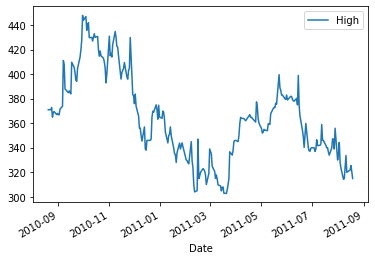

In [ ]:
#Plot trend for a particular stock
import matplotlib.pyplot as plt
#Subset for a particular stock
stock_final = stock_final[stock_final['Name']=='NSE/BIRLACORPN']

#Generate a line plot
stock_final.plot(y='High')
plt.show()